# **Assignment \#4**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2

In [ ]:
# TODO: RA & Name
print('RA1: 199624' + 'João Guilherme Alves Santos')
print('RA2: 184181 ' + 'Maria Júlia de Lima Silva')

RA1: 199624João Guilherme Alves Santos
RA2: 184181 Maria Júlia de Lima Silva


## Objective

Exploring **unsupervised learning techniques** by using dimensionality reduction techniques.

## Import Libraries

In [ ]:
# Libraries are free to use! You can use Scikit-learn, Keras/TensorFlow, PyTorch, ...
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import os
import PIL
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## Dataset

Fashion-MNIST is a dataset of Zalando’s article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

Dataset Information:

- You should respect the following traininig/test split: 60,000 training examples, and 10,000 test examples. Avoid overfitting.

- The data is available at:
https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip:
‘train’ folder (fashion-mnist train.csv.zip) + ‘test’ folder (fashion-mnist test.csv.zip).

  - You can also download the data by the framework you are using.

- Each training and test example is assigned to one of the following labels: 0 t-shirt/top, 1 trouser, 2 pullover, 3 dress, 4 coat, 5 sandal, 6 shirt, 7 sneaker, 8 bag, 9 ankle boot.
- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255). Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv.

In [ ]:
"""
# Download Fashion-MNIST
!wget https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip
!sudo apt install unzip
!unzip -o fashion-mnist-dataset.zip
!unzip -o fashion-mnist-dataset/fashion-mnist_test.csv.zip
!unzip -o fashion-mnist-dataset/fashion-mnist_train.csv.zip
!zip --delete fashion-mnist-dataset.zip
!rm -r fashion-mnist-dataset
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")
x_train, y_train = train.iloc[:,1:].values/255, train.label.values
#print(train.describe())
#x_val, y_val = #?
"""

'\n# Download Fashion-MNIST\n!wget https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip\n!sudo apt install unzip\n!unzip -o fashion-mnist-dataset.zip \n!unzip -o fashion-mnist-dataset/fashion-mnist_test.csv.zip \n!unzip -o fashion-mnist-dataset/fashion-mnist_train.csv.zip\n!zip --delete fashion-mnist-dataset.zip\n!rm -r fashion-mnist-dataset \ntrain = pd.read_csv("fashion-mnist_train.csv")\ntest = pd.read_csv("fashion-mnist_test.csv")\nx_train, y_train = train.iloc[:,1:].values/255, train.label.values\n#print(train.describe())\n#x_val, y_val = #?\n'

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:



class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n =  x_test.max()
x_train = x_train / x_train.max() #normalized
x_test = x_test / x_test.max() #normalized

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

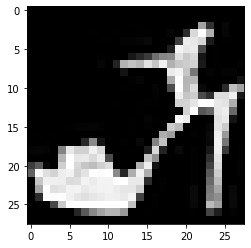

In [ ]:
plt.subplot()
plt.imshow(x_train[9], cmap=plt.get_cmap('gray'))

Training data shape :  (60000, 28, 28) (60000, 10)
Testing data shape :  (10000, 28, 28) (10000, 10)
Total number of outputs :  2
Output classes :  [0. 1.]


Text(0.5, 1.0, 'Ground Truth : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]')

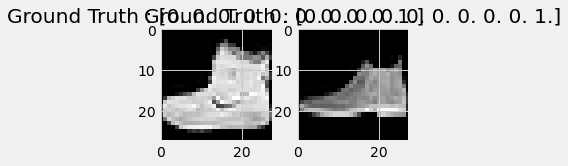

In [ ]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

In [ ]:
#train = (x_train, y_train)
#np.random.shuffle(train)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
y_val.shape

(12000, 10)

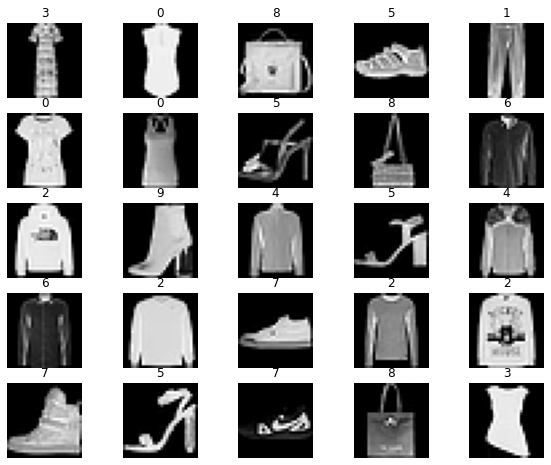

In [ ]:
# Plot a data grid for general observation
#->
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(x_train), size=(1,)).item()
    img, label = x_train[sample_idx], y_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Activities

1. (2 points) Baseline: Explore Convolutional Neural Networks with Fashion-MNIST. What is the accuracy of your CNN model? (1.5 points) Describe your Convolutional Neural Network architecture. (0.5 points) What are your conclusions about the baseline?

***Descrevendo um pouco sobre o modelo:***

O objetivo da dupla foi realmente explorar o potencial e o funcionamento de redes convolucionais para resolver problemas categorizados utilizando o keras, biblioteca de redes neurais. Essa biblioteca contém em si diversos parâmetros previamente implementados que auxiliaram (e muito) no desenvolvimento da arquitetura.

Como Loss_function foi escolhido o Cross Entropy categórico (que consiste, de uma maneira bem direta e não completa, em trabalhar com a diferença entre o dado e as probabilidades entre cada categoria do problema) enquanto como optimizer foi escolhido o 'rmsprop', otimizador de bom desempenho onde o termo de iteração no gradiente sai com a média exponencial decrescente. Como otimizador pensamos em utilizar o SGD, porém para o primeiro modelo que criamos foi observado que o rmsprop convergiu de maneira mais interessante no decorrer de épocas e nosso modelo cresceu bastante em desempenho e performance (convergindo melhor e obtendo uma precisão melhor).

Agora falando sobre a arquitetura, a dupla optou por um modelo simples e que explorasse bastante conceitos vistos em sala (como a própria convolução, pooling, dropout, e outros).

No inicio (contra-intuitivamente) pensamos na saída do modelo, justamente na divisão entre as convoluções e o modelo digamos 'tradicional' de redes neurais. Observamos casos na literatura com dados alimentados em uma camada achatada e que eram colocados em uma camada densa de saída. Os dados na camada achatada são empilhados e servem para a divisão entre a extração de características e o inicio da rede tradicional, marcada aí pelas duas camadas densas para saida do resultados.

Dado essa parte inicial, o que sobrou foi justamente uma das principais (senão a principal) parte das CNNs, que é justamente a convolução. Pensamos então em 3 conjuntos de convolução com 64 filtros em cada com ativação relu, a primeira convolução é colocada em cima da camada de entrada (input (28,28,1)) e em cada uma das convoluções é feito um Pooling, para compactar a imagem e extrair mais características. Com esse processo o que é esperado é justamente que a rede comece a identificar padrões e características envolvidas no processo para categorizar as imagens e assim identificar cada um.

Por fim, resolvemos também colocar um dropout para exercitar mais um dos conceitos vistos em aula e buscando principalmente evitar o overfitting dos dados.

In [ ]:
# Set the parameters of the neural network
loss_function = 'categorical_crossentropy' #?
optimizer = 'rmsprop'#?



In [ ]:
# Create your convolutional neural network architecture
model = tf.keras.models.Sequential([
    # Primeira conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Terceira conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)


(48000, 28, 28)
(48000, 10)
(12000, 28, 28)
(12000, 10)


In [ ]:
# Train loop
model.summary()

model.compile(loss = loss_function, optimizer=optimizer, metrics=['accuracy'])
#é necessario setar train e val
history = model.fit(x_train, y_train, epochs=25, steps_per_epoch=20, validation_data=(x_val, y_val), verbose = 1, validation_steps=3)

model.save("t4.h5")

[0.3375416696071625, 0.5344791412353516, 0.6202499866485596, 0.6653749942779541, 0.6892499923706055, 0.710562527179718, 0.7210208177566528, 0.7346875071525574, 0.7433958053588867, 0.7493333220481873, 0.7551249861717224, 0.7612291574478149, 0.7671666741371155, 0.7716875076293945, 0.7770624756813049, 0.7812291383743286, 0.7833541631698608, 0.7890625, 0.7929375171661377, 0.7974374890327454, 0.7963958382606506, 0.7993333339691162, 0.8061041831970215, 0.8049583435058594, 0.8072500228881836]


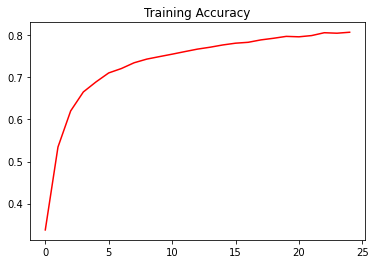

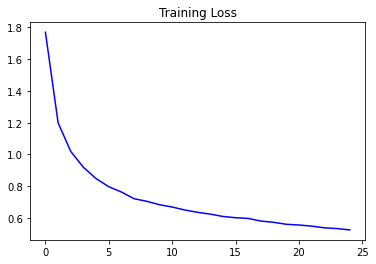

In [ ]:
# Report your accuracy using convolutional neural network
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
print(acc)

plt.plot(range(len(acc)), acc, 'red', label = 'training score by epochs')
plt.title('Training Accuracy')
plt.show()

plt.plot(range(len(loss)), loss, 'blue', label = 'training loss by epochs')
plt.title('Training Loss')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4752252995967865
Test accuracy: 0.8237000107765198


In [ ]:
# What are your conclusions about the baseline?


A conclusão é que o modelo representou resultados muitos interressantes e a rede realmente aprendeu a categorizar as figuras e extrair características das imagens no treino, apresentando para um modelo simples e com relativamente pouco treino uma precisão de mais de 82% no conjunto de testes.

Foi muito interessante ver (com o passar das épocas principalmente) que o modelo realmente vai aprendendo, converge de maneira adequada com o otimizador ajudando na convergência (ao testar o SGD e o rmsprop optamos pelo o segundo pelo resultado melhor) e tudo isso em uma arquitetura relativamente simples, na medida em que, por mais que tenham conceitos renomados e reconhecidamente eficiêntes, não é nenhum modelo com arquitetura complicada e com muitas divisões, saltos ou outras coisas e mesmo assim o modelo apresentou uma precisão boa com um treino relativamente curto.

No fim o que tiramos como conclusão é que as CNNs são boas em extrair características para o caso apresentado e são adequadas para resolver problemas de categorização como o problema apresentado.

2. (2 points) Using PCA: Re-do the first experiment considering the PCA dimensionality reduction. (1.5 points) Consider two different energies (variance) for reducing the image dimensionality. (0.5 points) What are the conclusions when using PCA in this problem? Does the accuracy improve?

In [ ]:
# Run PCA methods
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(x_train.reshape(-1, 784))
print(f"Representatividade da  principal componente: {pca.explained_variance_ratio_.sum(): .2f}")

pca = PCA(n_components = 4)
pca.fit(x_train.reshape(-1, 784))
print(f"Soma da representatividade das 4 primeiras principais componentes: {pca.explained_variance_ratio_.sum(): .2f}")

pca = PCA(n_components = 16)
pca.fit(x_train.reshape(-1, 784))
print(f"Soma da representatividade das 16 primeiras principais componentes: {pca.explained_variance_ratio_.sum(): .2f}")

pca = PCA(n_components = 100)
pca.fit(x_train.reshape(-1, 784))
print(f"Soma da representatividade das 100 primeiras principais componentes: {pca.explained_variance_ratio_.sum(): .2f}")

Representatividade da  principal componente:  0.29
Soma da representatividade das 4 primeiras principais componentes:  0.58
Soma da representatividade das 16 primeiras principais componentes:  0.77
Soma da representatividade das 100 primeiras principais componentes:  0.91


Levando em consideração a enorme quantidade de componentes que fazem parte dos dados que estão sendo trabalhados, trabalhar com as 100 primeiras principais componentes que constituem os dados pode ser uma boa ideia.

É possível observar que apenas com as 100 primeiras componentes principais carregam cerca de 91% da variação dos dados e utiliza-las em um modelo pode ser uma boa oportunidade de trocar o uso de grande parte dos componentes por maior velocidade de treino do modelo e um resultado relativamente próximo

Model: "sequential_287"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_115 (Conv2D)         (None, 8, 8, 64)          640       
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_116 (Conv2D)         (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dropout_4 (Dropout)         (None, 64)             

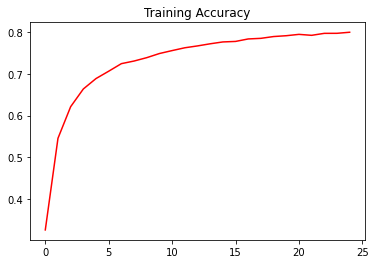

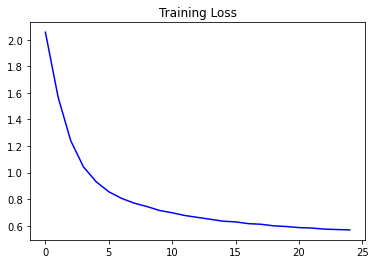

In [ ]:
# Re-do the first experiment considering the PCA dimensionality reduction

pca = PCA(n_components = 100)
pca.fit(x_train.reshape(-1, 784))
x_train_pca = pca.transform(x_train.reshape(-1, 784)).reshape(-1,10,10,1)
x_val_pca = pca.transform(x_val.reshape(-1, 784)).reshape(-1,10,10,1)

model = tf.keras.models.Sequential([
    # Primeira conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(10,10,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Train loop
model.summary()

model.compile(loss = loss_function, optimizer=optimizer, metrics=['accuracy'])
#é necessario setar train e val
history = model.fit(x_train_pca, y_train, epochs=25, steps_per_epoch=20, validation_data=(x_val_pca, y_val), verbose = 1, validation_steps=3)


# Report your accuracy using convolutional neural network
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
print(acc)

plt.plot(range(len(acc)), acc, 'red', label = 'training score by epochs')
plt.title('Training Accuracy')
plt.show()

plt.plot(range(len(loss)), loss, 'blue', label = 'training loss by epochs')
plt.title('Training Loss')
plt.show()

Gráficamente e por meio dos indicadores do modelo sendo utilizado após a redução de dimensionalidade, conseguimos observar que os resultados se manteram próximos aos encontrados no item a, mesmo que foram feitas mudanças no modelo afim de se enquadrarem as dimensões dos dados após o PCA. É perceptível uma boa taxa de acurácia, e uma taxa de loss compatível com a anterior do item a.

Então, podemos inferir que a diminuição da dimensionalidade não afetou de maneira contraproducente o resultado do modelo e mesmo com um menor número de componentes alcançou um valor bem próximo do valor anterior, mostrando uma boa oportunidade de tradeoff, com um treino com menos componentes (portanto tendendo a ser mais eficiente) e resultado que compete com um treino com todos os dados para um mesmo modelo.

3. (0.5 point) What can we infer when analyzing the breakdown of data into components using a chart to plot the data in 2-dimensional space to view separation?

In [ ]:
# In order to see how the PCA components are separating out the digits, lets use the following method, plot_components, to plot the data in a 2 dimensional space to view separation.
# The input parameters are the PCA fit in X and the labels
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i]),
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])

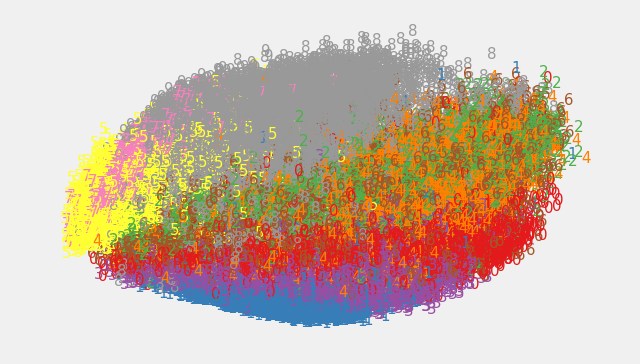

In [ ]:
# The input parameters are the PCA fit in X and the labels
pca = PCA(n_components = 2)
pca.fit(x_train.reshape(-1, 784))
x_train_pca = pca.transform(x_train.reshape(-1, 784))

plot_components(x_train_pca, np.argmax(y_train, axis=1))

Esse gráfico mostra cada categoria e, de uma maneira simplificada, o quanto cada componente "explicou" cada uma das categorias presentes. Para cada "núvem" é indicada que a componente se relaciona com uma categoria de maneira mais forte com as categorias da região do que outras componentes principais.

4. (2 points) How many components are needed for a better evaluation of the model? Define the minimum and maximum components to be tested using the energies_number method. How can we evaluate this graph and the quantity that was defined as best for the problem?

In [ ]:
pca = PCA(n_components = 100)
pca.fit(x_train.reshape(-1, 784))
x_train_pca = pca.transform(x_train.reshape(-1, 784))
x_train_pca.reshape(-1,10,10,1).shape

(48000, 10, 10, 1)

In [ ]:
# Iteratively check how many principal components would be required in order to reach a reasonable accuracy with the same random neural network.
from tensorflow.keras.layers import InputLayer

def energies_number(min, max, X, y_train, x_val, y_val):
    # Select a range of min and max number of dimensions, min/max.

    acc_list, pc_list = [], []
    for pc in range(min,max):
        X = np.reshape(X, (-1, 784))
        x_val = np.reshape(x_val, (-1, 784))
        pca = PCA(n_components = pc)
        pca.fit(X)
        x_pca = pca.transform(X)
        x_val_pca = pca.transform(x_val)

        model = Sequential()
        model.add(InputLayer(input_shape=(pc, )))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        model.compile(loss = loss_function, optimizer=optimizer, metrics=['accuracy'])
        history = model.fit(x_pca, y_train, epochs=10, steps_per_epoch=10, validation_data=(x_val_pca, y_val), verbose = 0, validation_steps=3)
        acc = history.history['accuracy'][-1]
        acc_list.append(acc)
        pc_list.append(pc)
    return acc_list, pc_list


#######################################
#importing again (to avoid any problem with shapes)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
x_train = x_train / x_train.max()
x_val = x_val / x_val.max()
x_test = x_test / x_test.max()
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
# Set the parameters of the neural network
loss_function = 'categorical_crossentropy' #?
optimizer = 'rmsprop'#?
#######################################


acc_list, pc_list = energies_number(1,120, x_train, y_train, x_val, y_val)


In [ ]:
# Iteratively check how many principal components would be required in order to reach a reasonable accuracy with the same random neural network.
from tensorflow.keras.layers import InputLayer

def energies_number(min, max, X, y_train, x_val, y_val):
    # Select a range of min and max number of dimensions, min/max.

    acc_list, pc_list = [], []
    for pc in range(min,max, 50):
        X = np.reshape(X, (-1, 784))
        x_val = np.reshape(x_val, (-1, 784))
        pca = PCA(n_components = pc)
        pca.fit(X)
        x_pca = pca.transform(X)
        x_val_pca = pca.transform(x_val)

        model = Sequential()
        model.add(InputLayer(input_shape=(pc, )))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        model.compile(loss = loss_function, optimizer=optimizer, metrics=['accuracy'])
        history = model.fit(x_pca, y_train, epochs=10, steps_per_epoch=10, validation_data=(x_val_pca, y_val), verbose = 0, validation_steps=3)
        acc = history.history['accuracy'][-1]
        acc_list.append(acc)
        pc_list.append(pc)
    return acc_list, pc_list


#######################################
#importing again (to avoid any problem with shapes)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
x_train = x_train / x_train.max()
x_val = x_val / x_val.max()
x_test = x_test / x_test.max()
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
# Set the parameters of the neural network
loss_function = 'categorical_crossentropy' #?
optimizer = 'rmsprop'#?
#######################################


acc_list, pc_list = energies_number(1,784, x_train, y_train, x_val, y_val)


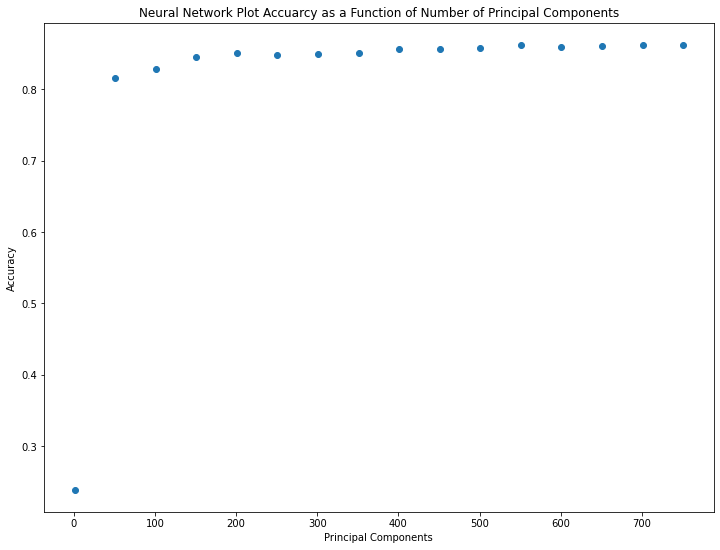

In [ ]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('Neural Network Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

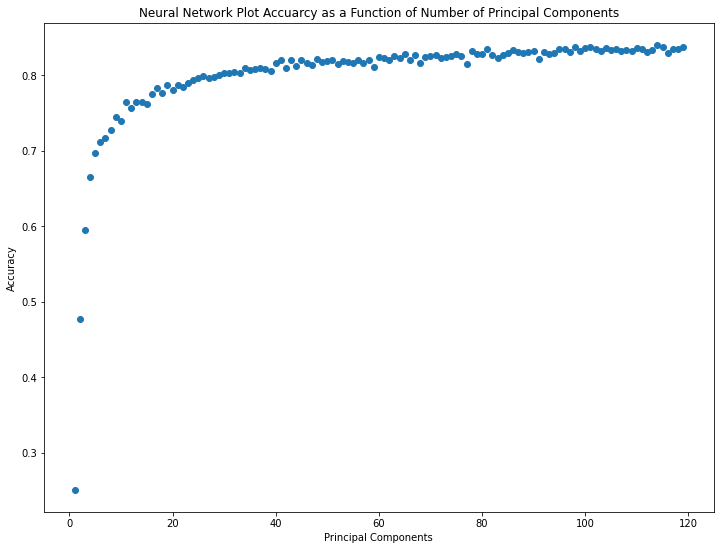

In [ ]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('Neural Network Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

In [ ]:
print('The maximum accuracy attained is ',np.max(acc_list),'% with ',pc_list[np.where(acc_list == np.max(acc_list))[0][0]],' principal components. Beyond this peak, additional principal components appear to mostly contribute noise.')

The maximum accuracy attained is  0.8400624990463257 % with  114  principal components. Beyond this peak, additional principal components appear to mostly contribute noise.


  Assim como levantado na questão 2, em que foram observadas as principais componentes dos dados para diferentes valores de pc e foi observado que 100 commponentes representam cerca de 91% da variância dos dados, o gráfico apresentado mostrou essa tendência.
  
  Com base no modelo que utilizamos nessa questão, é possível observar que a partir de um certo número de componentes principais (no caso 114) o modelo já tem um valor máximo e é possível inferir que o PCA com valores a partir de um valor próximo de 50 componentes até valores maiores já apresenta ótimos resultados, comparáveis ao modelo sem o PCA.
  Vale notar também que a máxima acurácia obtida não foi com todas as componentes sendo utilizadas. O gráfico tem um pico e a partir desse valor o gráfico começa a apresentar uma queda. Esse quadro é devido o fato de que a partir de um ponto as componentes que são postas já não auxiliam no resultado e, pelo contrário, começam a contribuir de maneira contraproducente ao resultado, gerando ruído.

5. (3.5 points) Using Autoencoders: Re-do the first experiment (question 2) considering Autoencoders for reducing the image dimensionality. (3 points) Consider two different latent vector sizes for reducing the image dimensionality. (0.5 points) What are the conclusions when using Autoencoders in this problem? Does accuracy improve?

Autoencoders are a branch of neural networks which attempt to compress the information of the input variables into a reduced dimensional space and then recreate the input data set. Typically the autoencoder is trained over some iterations using gradient descent, minimizing the mean squared error.
The key component is the “bottleneck” hidden layer. This is where the information from the input has been compressed. By extracting this layer from the model, each node can be treated as a variable in the same way each chosen principal component is used in the following models.

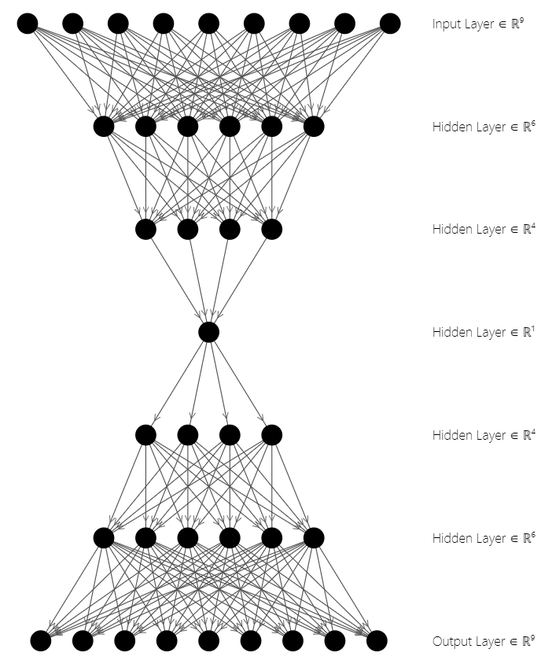

In [ ]:
#input_data
(train, _), (test, _) = tf.keras.datasets.fashion_mnist.load_data()
train = train / train.max() #normalized
test = test / test.max() #normalized
train, val = train_test_split(train, test_size=0.2)


In [ ]:
# Create your AutoEncoder network architecture:
from tensorflow.keras.models import Model
# Aproveitando a 'vibe' de redes convolucionais, faremos um autoencoder convolucional.
input_data = tf.keras.layers.Input(shape=(28, 28, 1))

# Parte do encoder da aplicação se baseia em pegar a imagem e reduzir ela, no caso da CNN estraimos filtros com as características das imagens
x = tf.keras.layers.Conv2D(40, (3, 3), activation="relu", padding="same")(input_data)
x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)
x = tf.keras.layers.Conv2D(20, (3, 3), activation="relu", padding="same")(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)

#Camada intermediária
x = tf.keras.layers.Conv2D(10, (3, 3), activation="relu", padding="same")(x)

# Parte do decoder da aplicação deve fazer o contrário do encoder
x = tf.keras.layers.Conv2DTranspose(20, (3, 3), strides=2, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2DTranspose(40, (3, 3), strides=2, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
modelautoencoder = Model(input_data, x)
modelautoencoder.compile(optimizer="adam", loss="binary_crossentropy")
modelautoencoder.summary()



Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_306 (InputLayer)      [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_83 (Conv2D)          (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 14, 14, 40)       0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 14, 14, 20)        7220      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 7, 7, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 7, 7, 10)          181

In [ ]:
#training
modelautoencoder.fit(x=train, y=train, epochs=5, batch_size=256, shuffle=True, validation_data=(val, val),)

Epoch 1/5
188/188 [==============================] - 132s 698ms/step - loss: 0.3997 - val_loss: -1075.4497
Epoch 2/5
188/188 [==============================] - 124s 658ms/step - loss: 0.2884 - val_loss: -1081.2063
Epoch 3/5
188/188 [==============================] - 108s 576ms/step - loss: 0.2810 - val_loss: -1088.1060
Epoch 4/5
188/188 [==============================] - 111s 591ms/step - loss: 0.2779 - val_loss: -1086.4908
Epoch 5/5
188/188 [==============================] - 122s 649ms/step - loss: 0.2757 - val_loss: -1087.3932


313/313 [==============================] - 9s 27ms/step


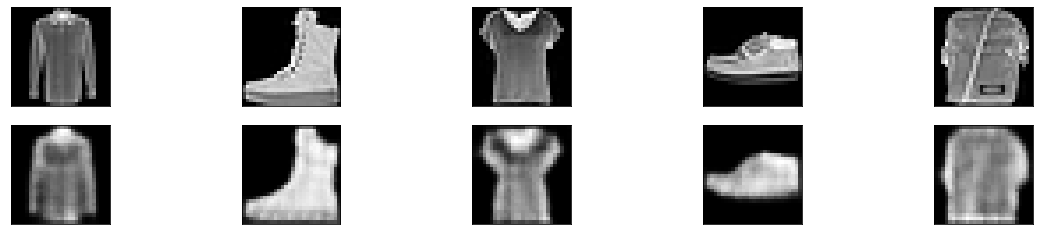

In [ ]:
predictions = modelautoencoder.predict(test)

In [ ]:
# Create your AutoEncoder network architecture:
from tensorflow.keras.models import Model
# Aproveitando a 'vibe' de redes convolucionais, faremos um autoencoder convolucional.
input_data = tf.keras.layers.Input(shape=(28, 28, 1))

# Parte do encoder da aplicação se baseia em pegar a imagem e reduzir ela, no caso da CNN estraimos filtros com as características das imagens
x = tf.keras.layers.Conv2D(40, (3, 3), activation="relu", padding="same")(input_data)
x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)
x = tf.keras.layers.Conv2D(20, (3, 3), activation="relu", padding="same")(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)

#Camada intermediária
x = tf.keras.layers.Conv2D(15, (3, 3), activation="relu", padding="same")(x)

# Parte do decoder da aplicação deve fazer o contrário do encoder
x = tf.keras.layers.Conv2DTranspose(20, (3, 3), strides=2, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2DTranspose(40, (3, 3), strides=2, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
modelautoencoder = Model(input_data, x)
modelautoencoder.compile(optimizer="adam", loss="binary_crossentropy")
modelautoencoder.summary()



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 20)        7220      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 20)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 15)          2715

In [ ]:
#training
modelautoencoder.fit(x=train, y=train, epochs=5, batch_size=256, shuffle=True, validation_data=(val, val),)

Epoch 1/5
188/188 [==============================] - 158s 839ms/step - loss: 0.2765 - val_loss: -1083.0530
Epoch 2/5
188/188 [==============================] - 159s 847ms/step - loss: 0.2727 - val_loss: -1086.5770
Epoch 3/5
188/188 [==============================] - 158s 842ms/step - loss: 0.2703 - val_loss: -1088.3428
Epoch 4/5
188/188 [==============================] - 157s 836ms/step - loss: 0.2687 - val_loss: -1091.2927
Epoch 5/5
188/188 [==============================] - 157s 835ms/step - loss: 0.2674 - val_loss: -1092.1039


313/313 [==============================] - 9s 28ms/step


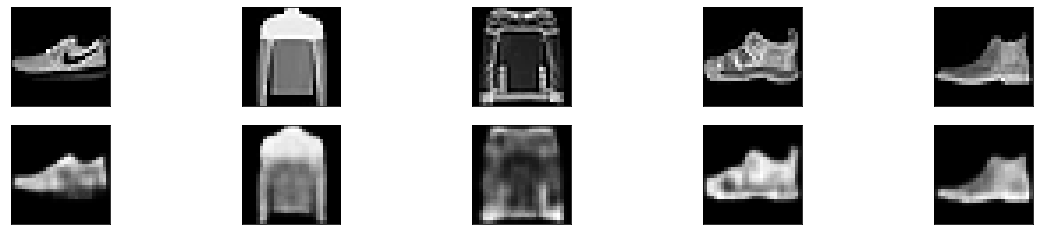

In [ ]:
predictions = modelautoencoder.predict(test)

In [ ]:
# Re-do the first experiment (question 2) considering the autoencoder dimensionality reduction

#Agora vamos usar o PCA para reduzir alguns componentes e utilizar apenas componentes principais dos modelos

#input_data
(train, _), (test, _) = tf.keras.datasets.fashion_mnist.load_data()
train = train / train.max() #normalized
test = test / test.max() #normalized
train, val = train_test_split(train, test_size=0.2)

pca = PCA(n_components = 196)
pca.fit(train.reshape(-1, 784))
train_pca = pca.transform(train.reshape(-1, 784)).reshape(-1,14,14,1)
val_pca = pca.transform(val.reshape(-1, 784)).reshape(-1,14,14,1)
train_pca = train_pca.astype('float32')/train_pca.max()
val_pca = val_pca.astype('float32')/train_pca.max()

# Aproveitando a 'vibe' de redes convolucionais, faremos um autoencoder convolucional.
input_data = tf.keras.layers.Input(shape=(14, 14, 1))

# Parte do encoder da aplicação se baseia em pegar a imagem e reduzir ela, no caso da CNN estraimos filtros com as características das imagens
x = tf.keras.layers.Conv2D(40, (3, 3), activation="relu", padding="same")(input_data)
x = tf.keras.layers.MaxPooling2D((2, 2), padding="same")(x)

#Camada intermediária
x = tf.keras.layers.Conv2D(20, (3, 3), activation="relu", padding="same")(x)

# Parte do decoder da aplicação deve fazer o contrário do encoder
x = tf.keras.layers.Conv2DTranspose(40, (3, 3), strides=2, activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)


# Autoencoder
modelautoencoderpca = Model(input_data, x)
modelautoencoderpca.compile(optimizer="adam", loss="binary_crossentropy")
modelautoencoderpca.summary()


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_312 (InputLayer)      [(None, 14, 14, 1)]       0         
                                                                 
 conv2d_104 (Conv2D)         (None, 14, 14, 40)        400       
                                                                 
 conv2d_105 (Conv2D)         (None, 14, 14, 20)        7220      
                                                                 
 conv2d_transpose_57 (Conv2D  (None, 28, 28, 40)       7240      
 Transpose)                                                      
                                                                 
 conv2d_106 (Conv2D)         (None, 28, 28, 1)         361       
                                                                 
Total params: 15,221
Trainable params: 15,221
Non-trainable params: 0
______________________________________________________

In [ ]:
#training
modelautoencoderpca.fit(x=train_pca, y=train, epochs=5, batch_size=50, shuffle=True, validation_data=(val_pca, val))

Epoch 1/5
960/960 [==============================] - 172s 178ms/step - loss: 0.5266 - val_loss: 2.1723
Epoch 2/5
960/960 [==============================] - 189s 197ms/step - loss: 0.5041 - val_loss: 1.6619
Epoch 3/5
960/960 [==============================] - 167s 174ms/step - loss: 0.4988 - val_loss: 1.6897
Epoch 4/5
960/960 [==============================] - 156s 163ms/step - loss: 0.4950 - val_loss: 1.7017
Epoch 5/5
960/960 [==============================] - 150s 156ms/step - loss: 0.4926 - val_loss: 1.7488


313/313 [==============================] - 7s 21ms/step


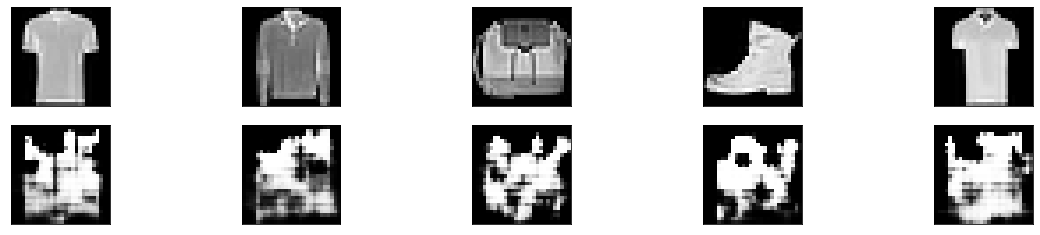

In [ ]:
# What are the conclusions when using Autoencoders in this problem? Does accuracy improve?

pca = PCA(n_components = 196)
pca.fit(train.reshape(-1, 784))
test_pca = pca.transform(test.reshape(-1, 784)).reshape(-1,14,14,1)
Test_pca = test_pca.astype('float32')/train_pca.max()

predictions = modelautoencoderpca.predict(test_pca)

In [ ]:
# What are the conclusions when using Autoencoders in this problem? Does accuracy improve?

O Autoencoder no geral é adequado quando se trata de minimizar o erro de reconstrução entre a entrada e a saída.
O Autoencoders convolucional se mostrou muito interessante. O que foi observado é que ele observa características da imagem. A convolução trabalha de modo a extrair características da imagem e assim montar o resultado.

Com pouco treinamento ambos os modelos (tanto a com layer intermediário maior quanto a com menor layer intermediário já com poucas épocas esboçam não só os contornos das imagens como representam até certos "detalhes", como marcas/desenhos em sapatos, recortes em mangas, diferença entre sola de sapato e resto do sapato. E é possível observar que uma camada intermediária maior (hidden layer que seria ali o fim do bottle-neck, no meio entre o encoder e decoder) quanto maior é ela, mais detalhes ela consegue absorver da imagem. Ou seja, são guardadas mais características na "compressão"/"extração" de dados da imagem.

Por fim, é possível ver que o autoencoder é um excelente extrator de características e é muito eficiente para aprender codificação de dados, e um Autoencoder bem treinado pode auxiliar em diversos aspectos, como possibilitar compressão de imagens, retirar ruídos de imagens (é possível retirar ruidos de imagens caso a rede já tenha aprendido certas características de uma categoria de imagem e então pode gerar uma saída com imagens melhores) e outros problemas que envolvam codificação de imagens.

Foi optado por retirar algumas camadas e deixar a camada intermediária um pouco maior, porém é nítido que o resultado não foi bem o que esperávamos. O resultado final foi ruim, culminando em imagens bem diferentes das originais. Durante o treino é nítido que o modelo não convergiu.

Esse resultado pode ter corrido por diversos fatores, que podem relacionar com o fato das próprias imagens serem pequenas (28,28) e a redução da convolução+pooling juntamente ao PCA arrancar mais caracterísitcas/informações do que deveria.

Provavelmente uma arquitetura convolucional diferente ou mesmo optar pelo treino com uma autoencoders próxima a redes neurais tradicionais e não às convolucionais para esse tipo de caso poderia significar uma extração melhor das características e por fim um resultado bem melhor para o PCA. Para o nosso modelo em específico o resultado com o PCA não foi o esperado.

## Deadline

Monday, November 18, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- November 19, 11:59 pm : grade * 0.75
- November 20, 11:59 pm : grade * 0.5
- November 21, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**